In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [2]:
triads = [['BPS'+str(i),'BPS'+str(i+20),'BPS'+str(i+40)] for i in range(1,21)]

In [3]:
df = pd.read_csv('Data/15_Feb_C1_Bad_Case_8am.csv')


# Isolation Forest

<AxesSubplot:>

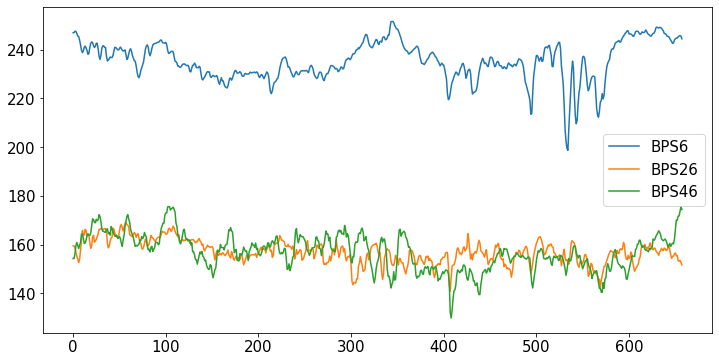

In [4]:
plt.rc('figure',figsize=(12,6))
plt.rc('font',size=15)
df[triads[5]].plot()

In [7]:
outliers_fraction = float(.05)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(df[triads[5][0]].values.reshape(-1, 1))
data = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)

IsolationForest(contamination=0.05)

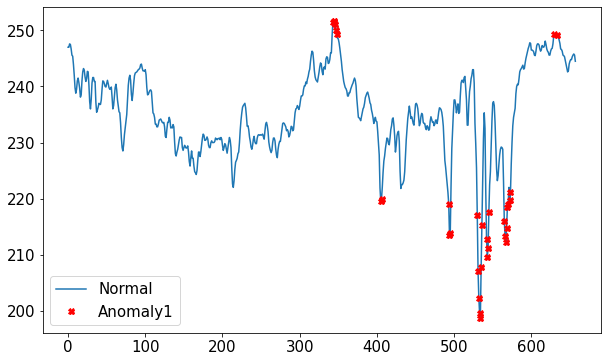

In [8]:
df['anomaly1']= model.predict(data)
a = df.loc[df['anomaly1'] == -1]
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df[triads[5][0]], label = 'Normal')
ax.plot(a[triads[5][0]],linestyle='none', marker='X', color='red', label = 'Anomaly1')
plt.legend()
plt.show();

In [10]:
outliers_fraction = float(.05)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(df[triads[5][1]].values.reshape(-1, 1))
data = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)

IsolationForest(contamination=0.05)

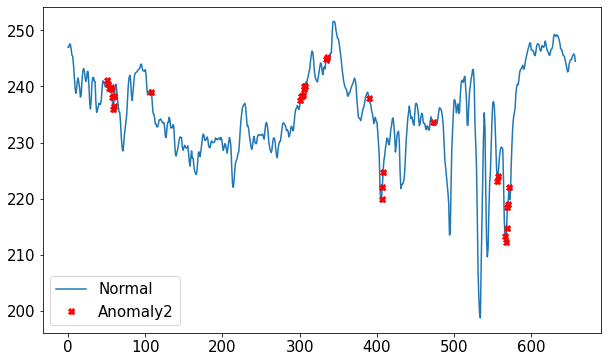

In [11]:
df['anomaly2']= model.predict(data)
a = df.loc[df['anomaly2'] == -1]
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df[triads[5][0]], label = 'Normal')
ax.plot(a[triads[5][0]],linestyle='none', marker='X', color='red', label = 'Anomaly2')
plt.legend()
plt.show();

In [12]:
outliers_fraction = float(.05)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(df[triads[5][2]].values.reshape(-1, 1))
data = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)

IsolationForest(contamination=0.05)

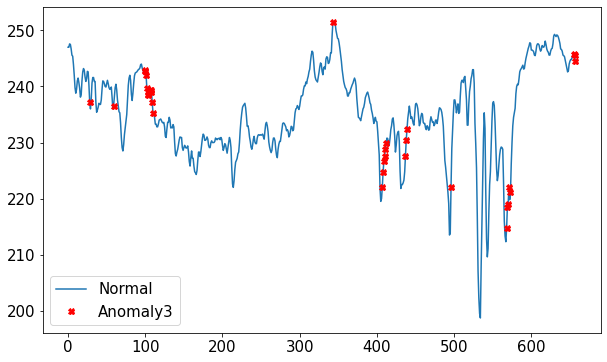

In [13]:
df['anomaly3']= model.predict(data)
a = df.loc[df['anomaly3'] == -1]
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df[triads[5][0]], label = 'Normal')
ax.plot(a[triads[5][0]],linestyle='none', marker='X', color='red', label = 'Anomaly3')
plt.legend()
plt.show();

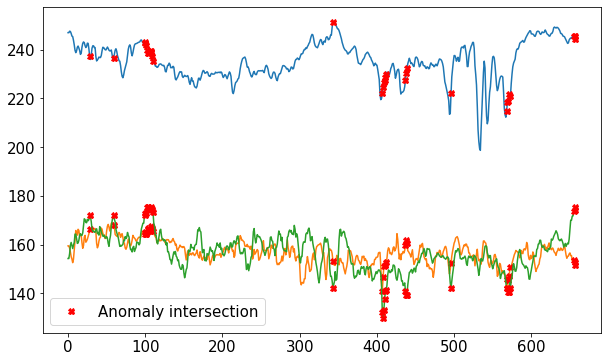

In [15]:
union = df.loc[[df['anomaly1'] == -1] and [df['anomaly2'] == -1] and df['anomaly3'] == -1]


fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df[triads[5][0]])
ax.plot(union[triads[5][0]],linestyle='none', marker='X', color='red', label = 'Anomaly intersection')
ax.plot(df[triads[5][1]])
ax.plot(union[triads[5][1]],linestyle='none', marker='X', color='red')
ax.plot(df[triads[5][2]])
ax.plot(union[triads[5][2]],linestyle='none', marker='X', color='red')
plt.legend()
plt.show()

C:\Users\Ryzen\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


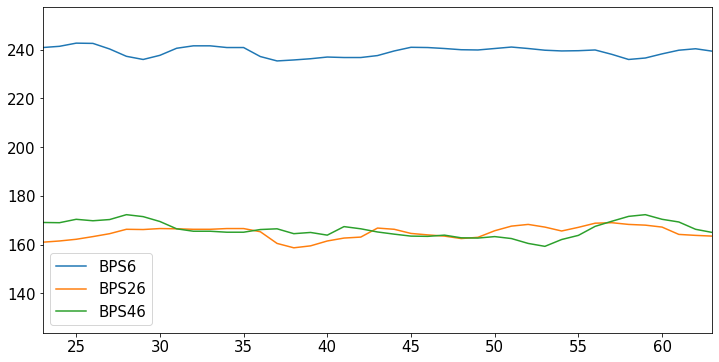

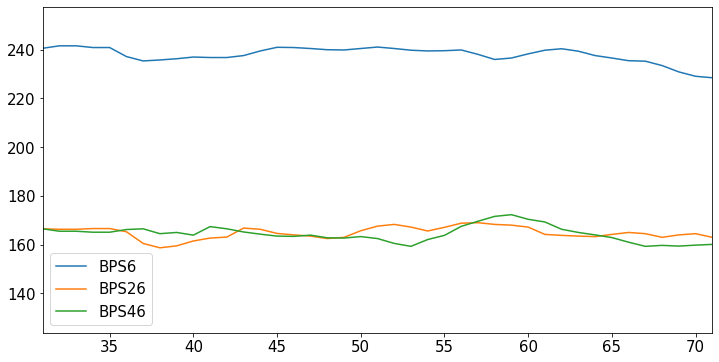

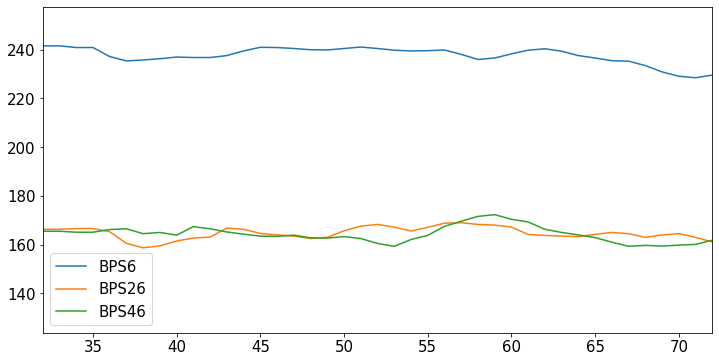

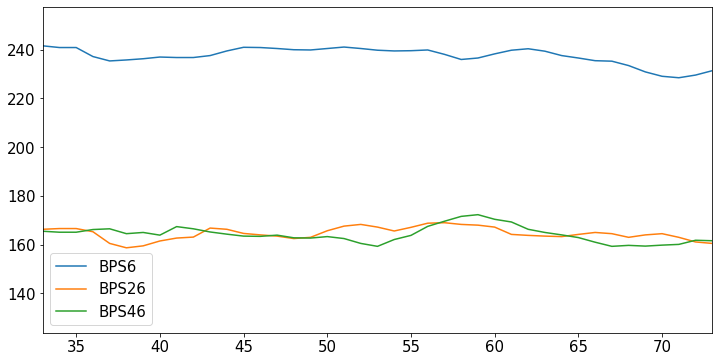

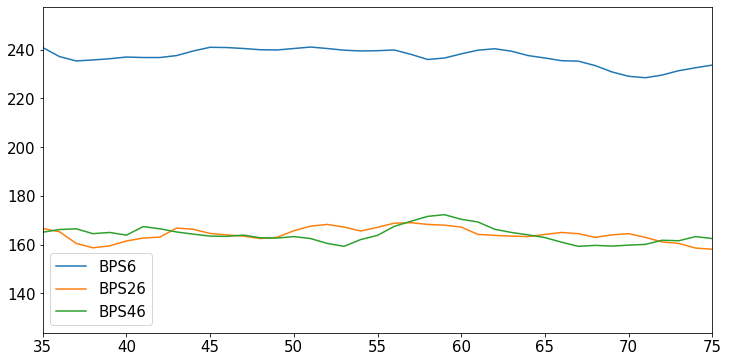

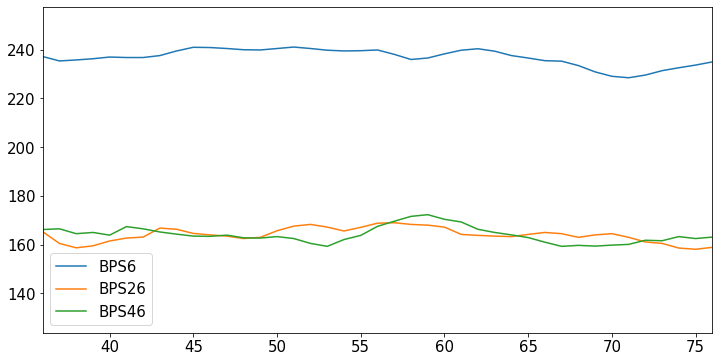

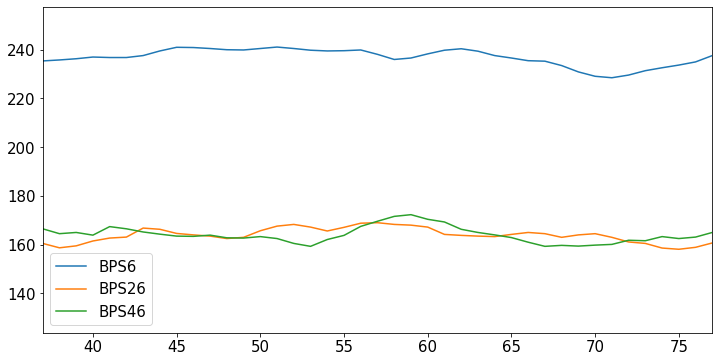

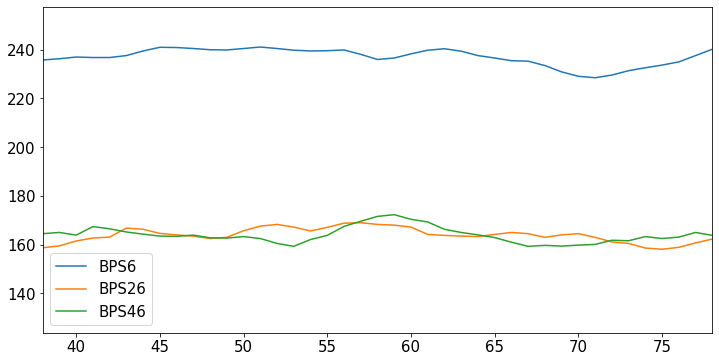

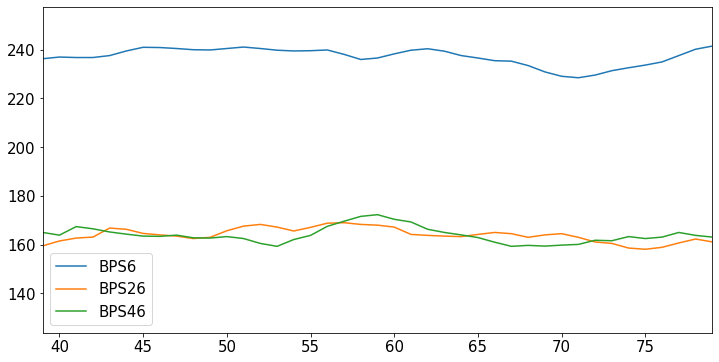

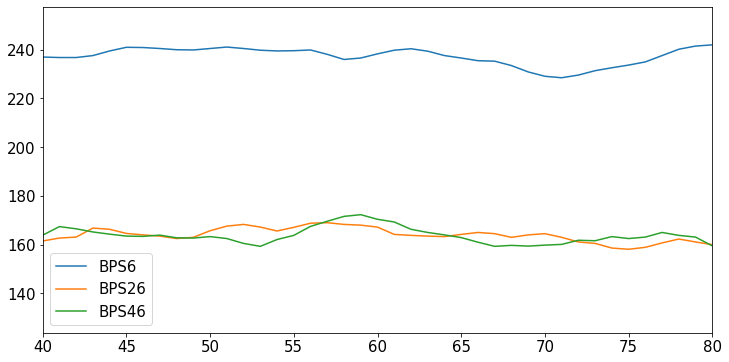

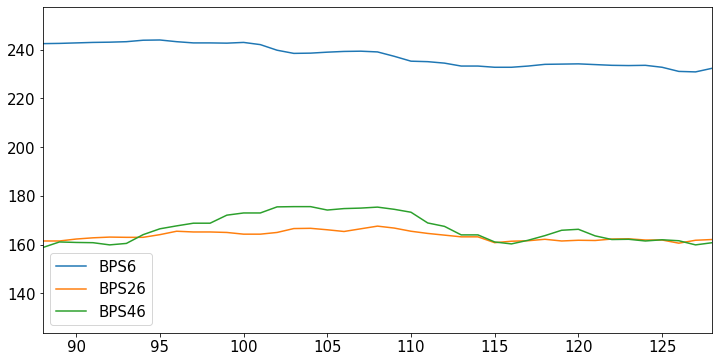

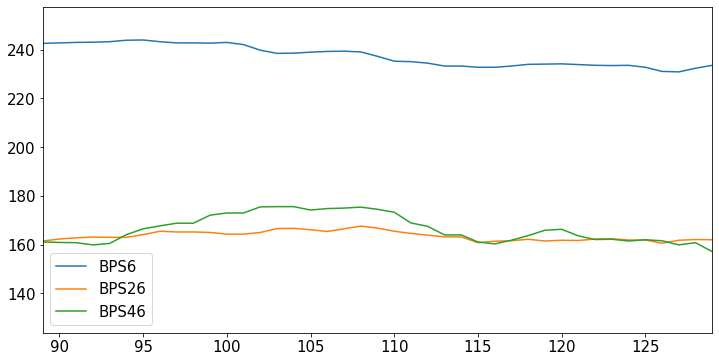

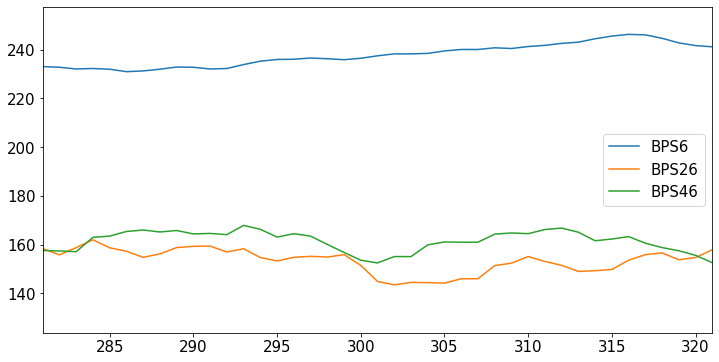

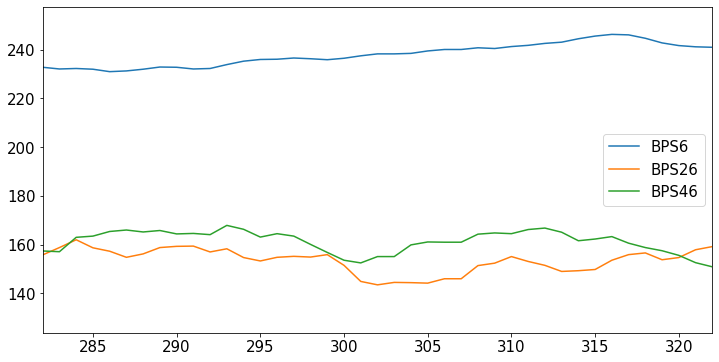

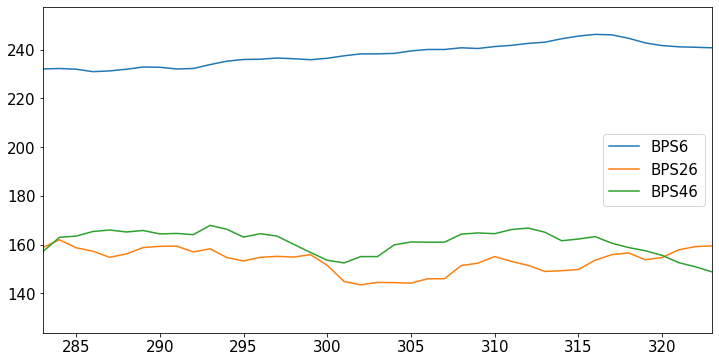

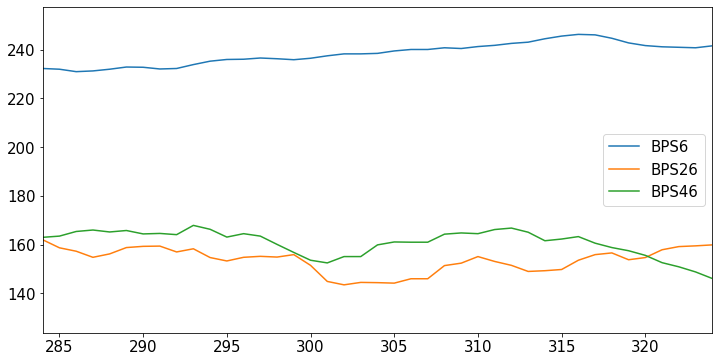

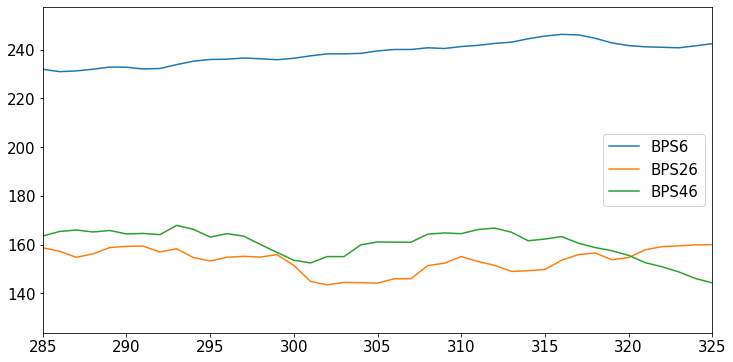

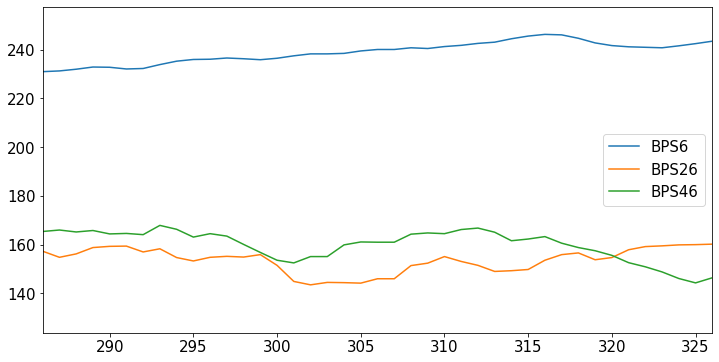

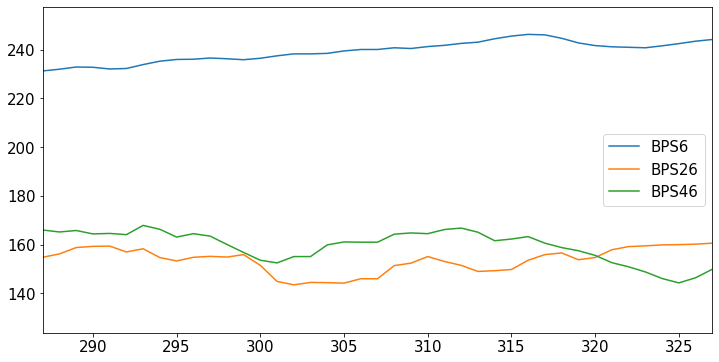

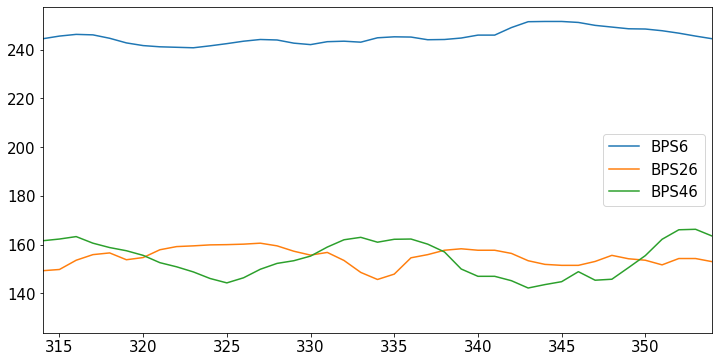

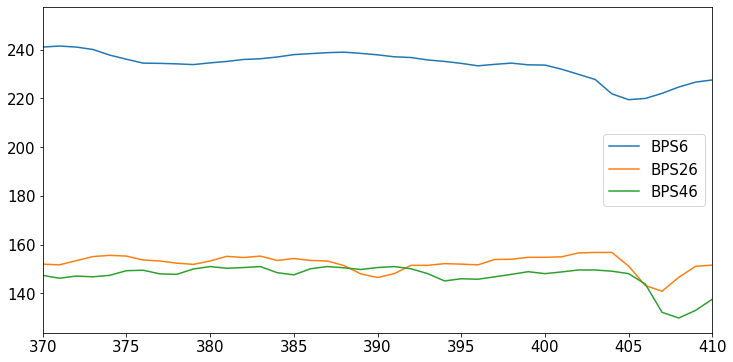

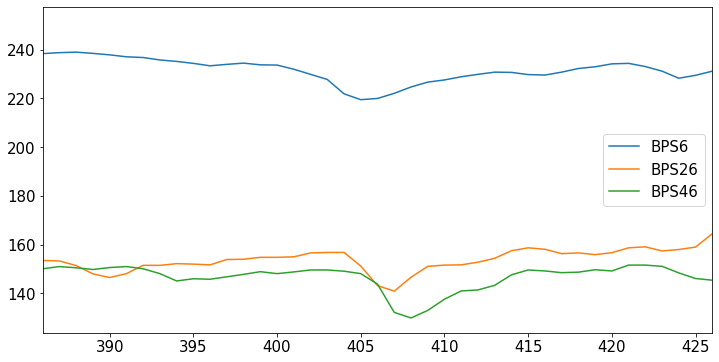

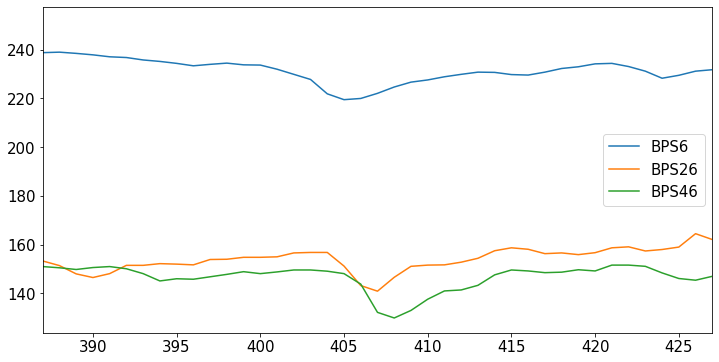

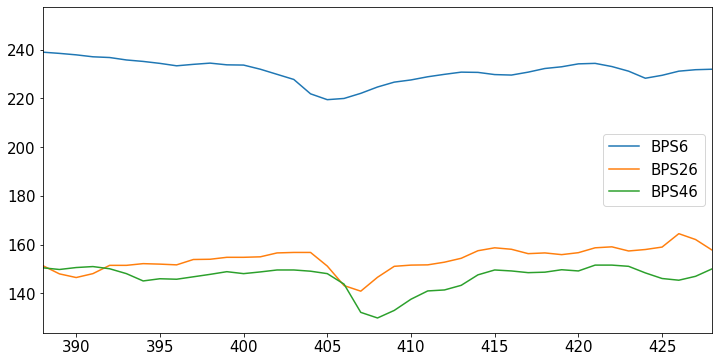

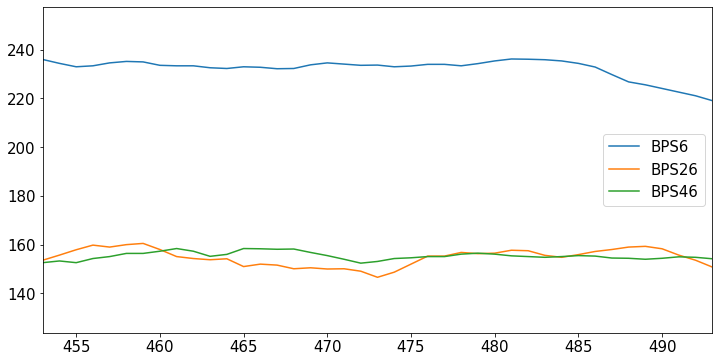

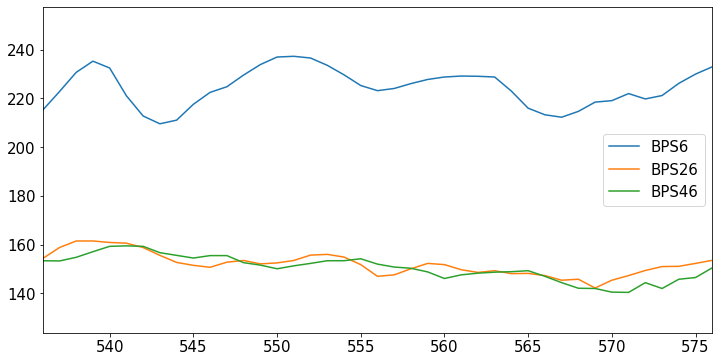

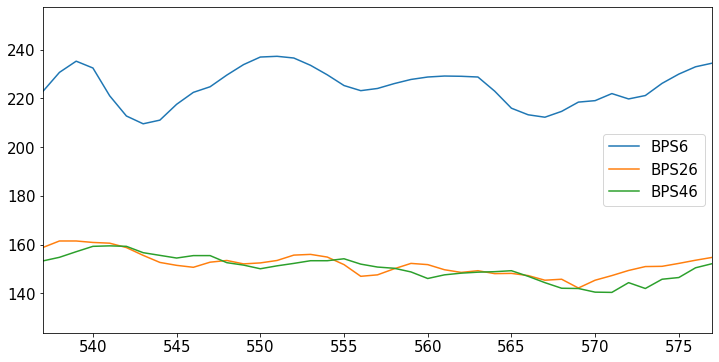

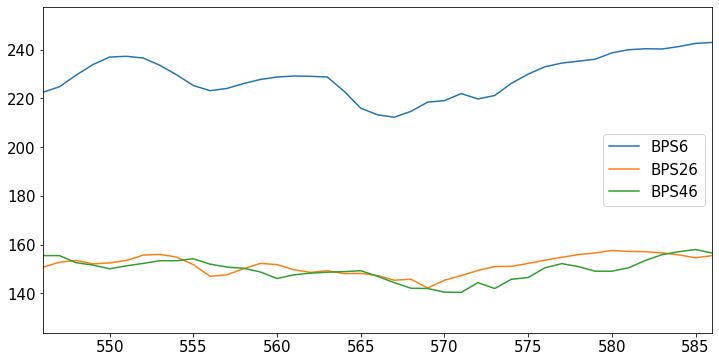

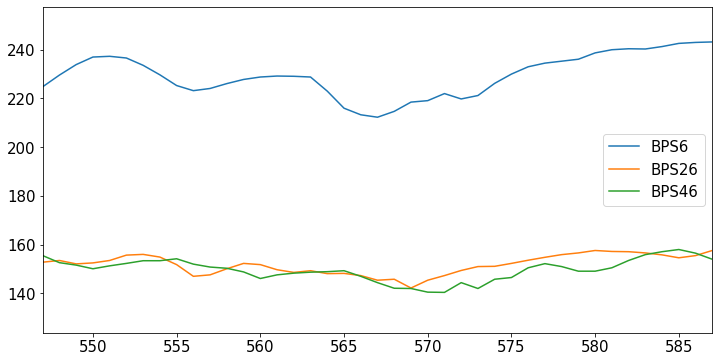

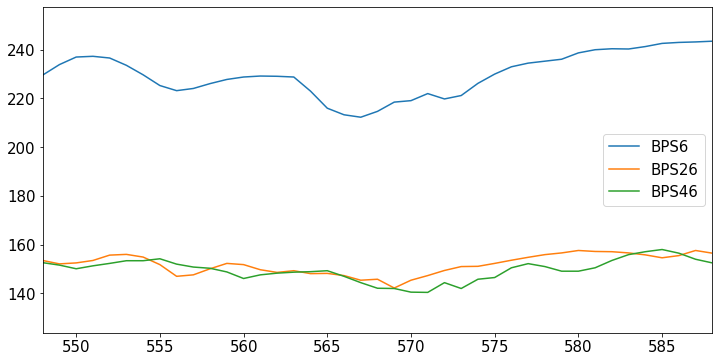

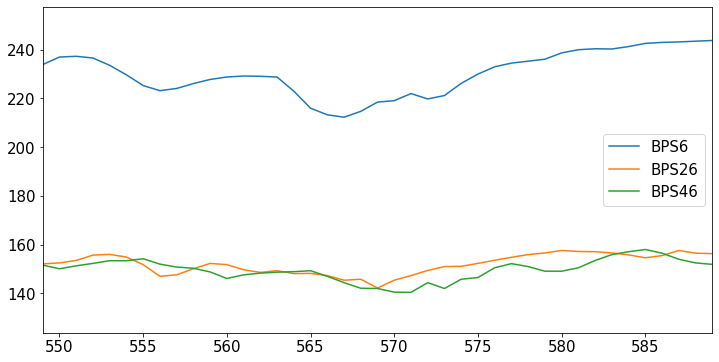

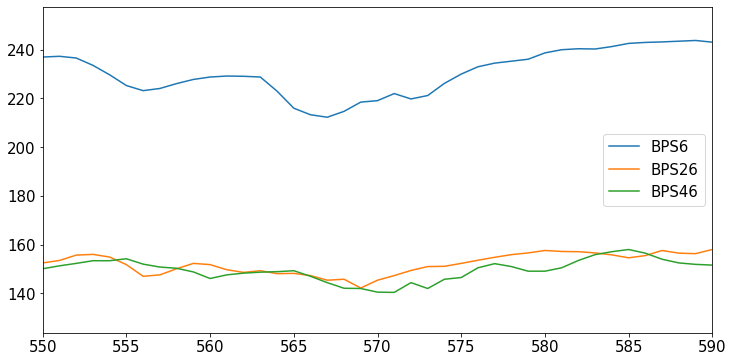

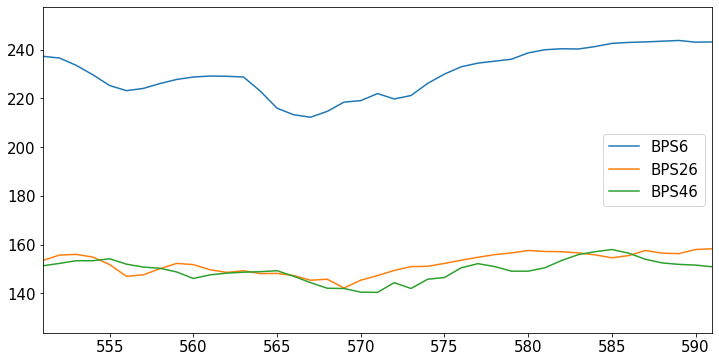

In [299]:
#zoomed in view of intersection points

result_set= np.array(union.index)
for i in result_set:
    df[triads[5]].plot(xlim=[i-20,i+20])

# Function for Isolation Forest

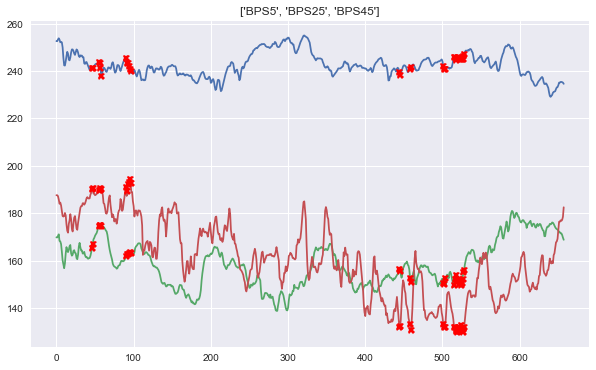

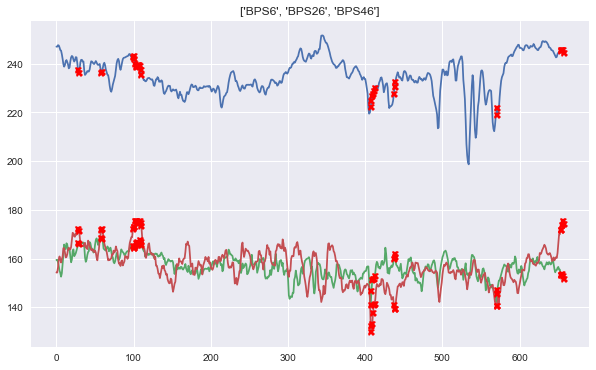

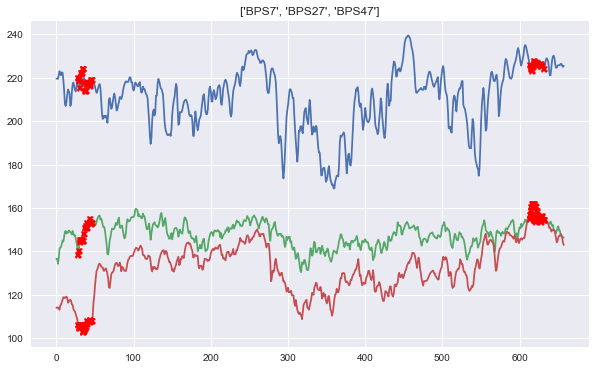

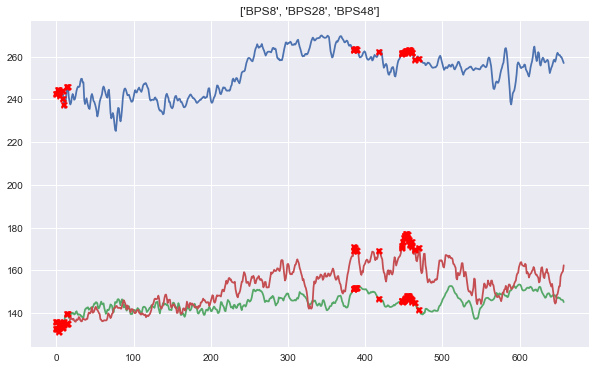

In [19]:
df = pd.read_csv('Data/15_Feb_C1_Bad_Case_8am.csv')
c_result=[]
for curr in triads[4:8]:
    
    outliers_fraction = float(.05)
    scaler = StandardScaler()
    
    np_scaled = scaler.fit_transform(df[curr[0]].values.reshape(-1, 1))
    data = pd.DataFrame(np_scaled)
    # train isolation forest
    model =  IsolationForest(contamination=outliers_fraction)
    model.fit(data)
    df['anomaly1']= model.predict(data)
    
    np_scaled = scaler.fit_transform(df[curr[1]].values.reshape(-1, 1))
    data = pd.DataFrame(np_scaled)
    # train isolation forest
    model =  IsolationForest(contamination=outliers_fraction)
    model.fit(data)
    df['anomaly2']= model.predict(data)
    
    np_scaled = scaler.fit_transform(df[curr[2]].values.reshape(-1, 1))
    data = pd.DataFrame(np_scaled)
    # train isolation forest
    model =  IsolationForest(contamination=outliers_fraction)
    model.fit(data)
    df['anomaly3']= model.predict(data)
                                        
    union = df.loc[[df['anomaly1'] == -1] and [df['anomaly2'] == -1] and df['anomaly3'] == -1]
    plt.style.use('seaborn')
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(df[curr])
    ax.plot(union[curr],linestyle='none', marker='X', color='red', linewidth='10')
    ax.set_title(curr)
    plt.show()    
    
    c_result.append(np.array(union.index))
                                                                                
                                 


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


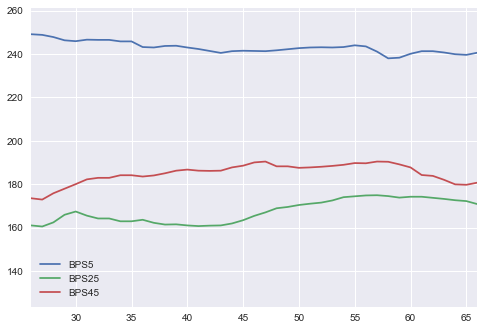

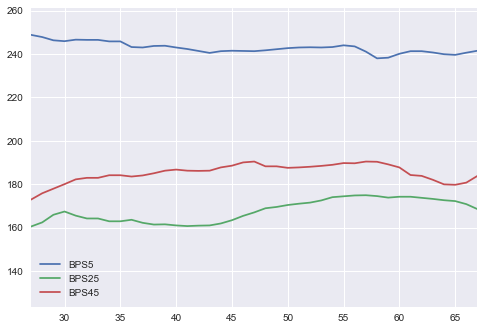

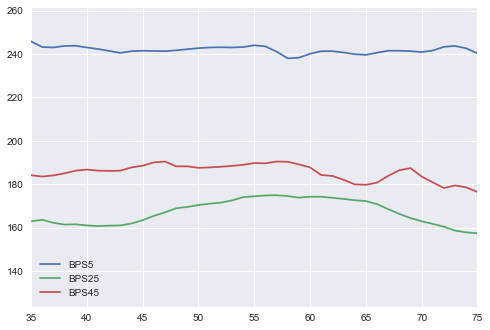

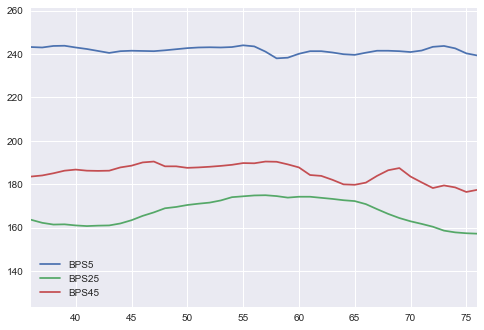

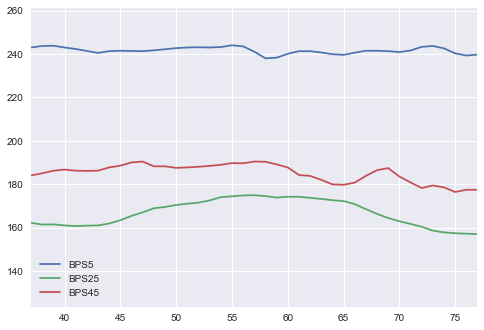

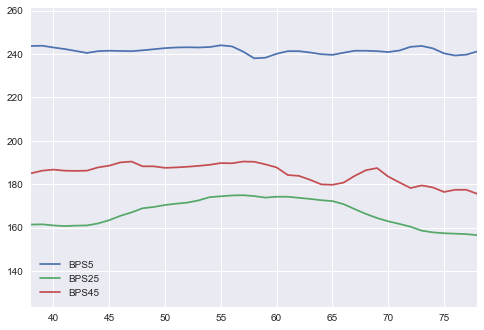

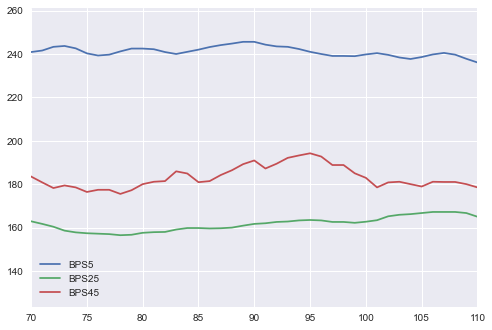

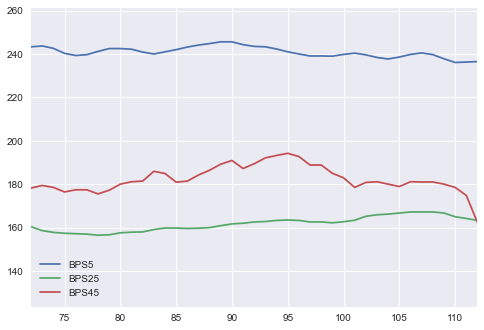

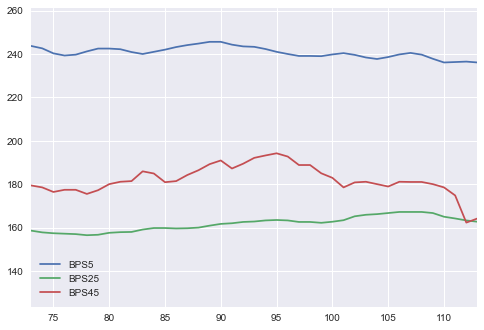

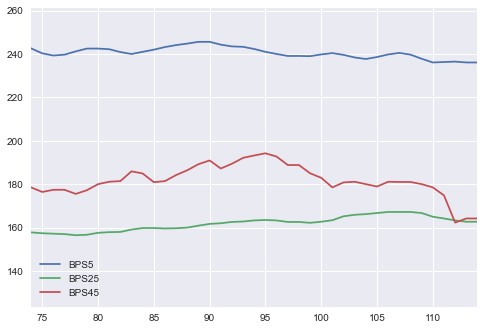

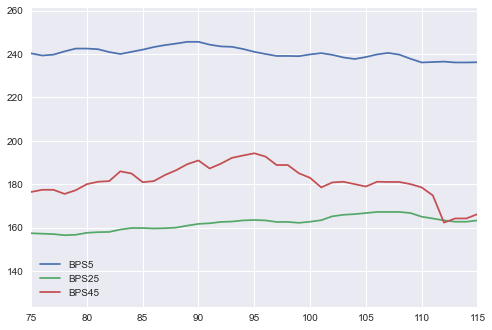

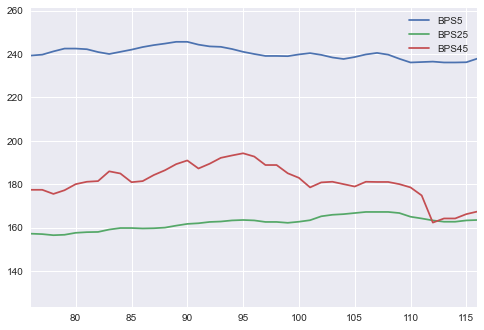

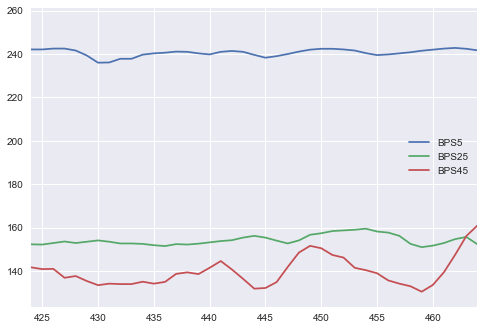

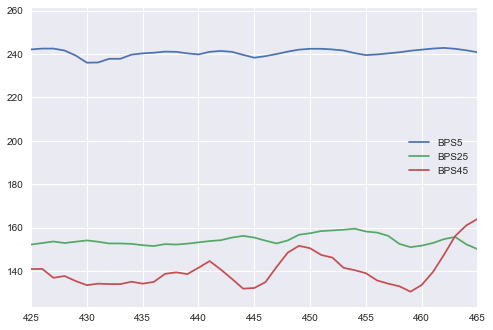

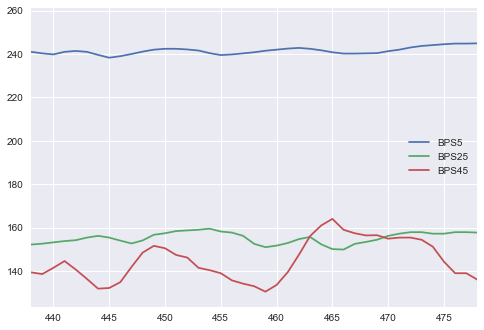

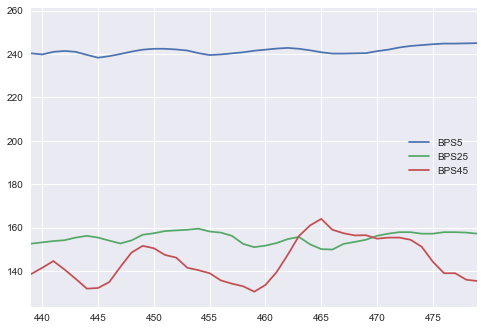

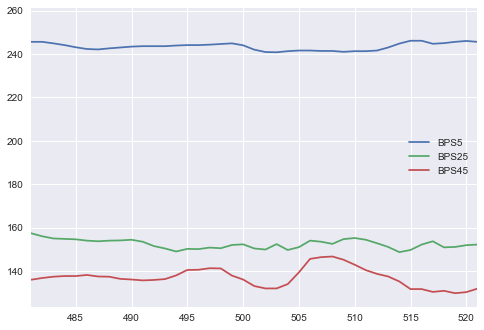

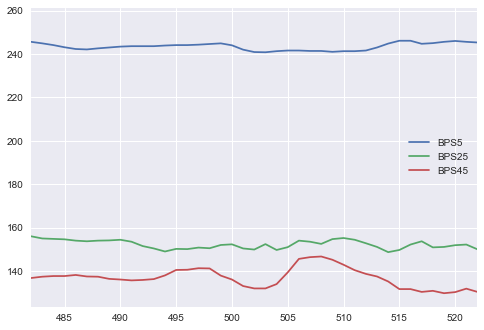

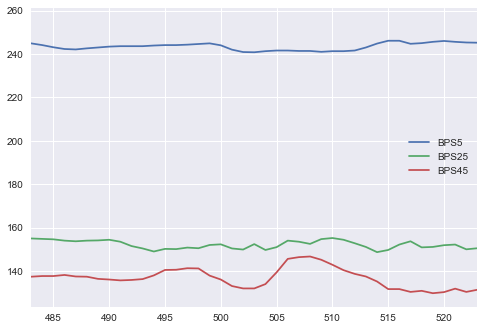

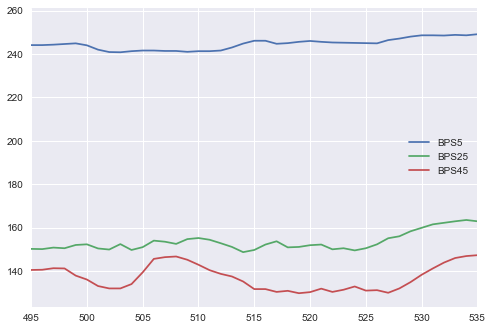

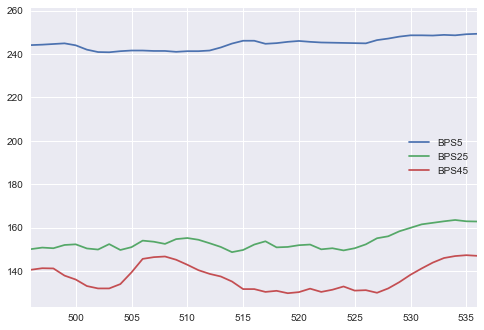

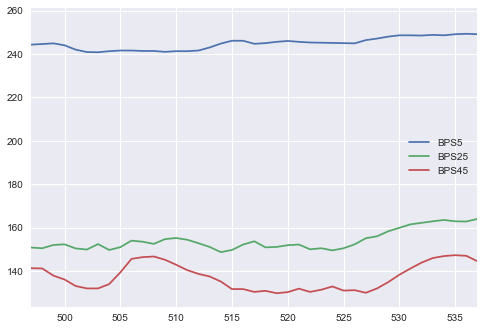

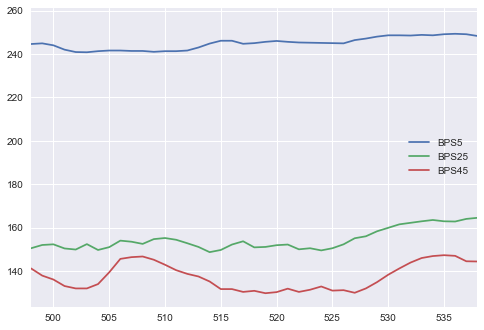

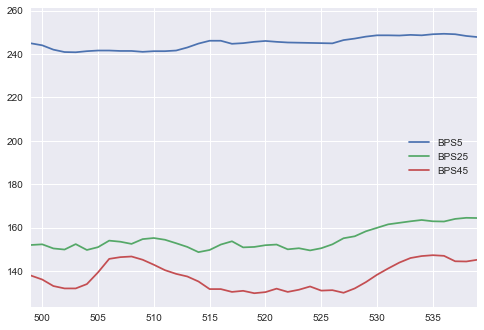

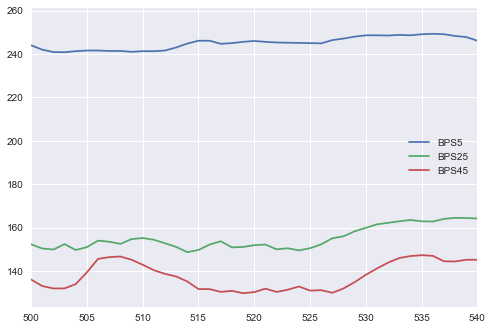

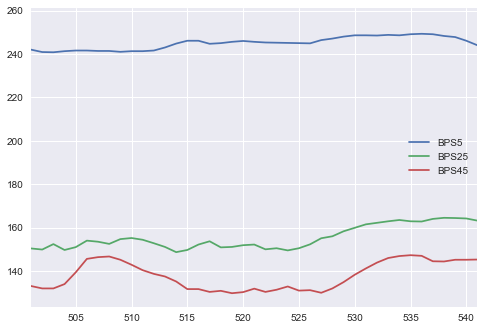

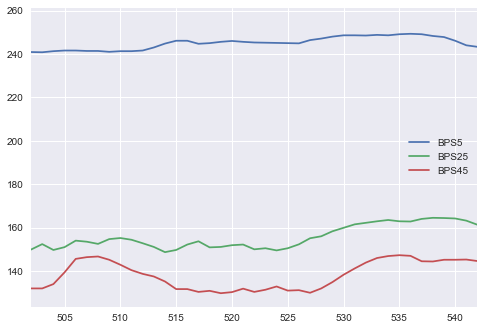

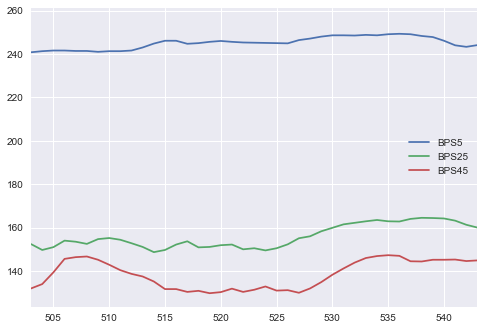

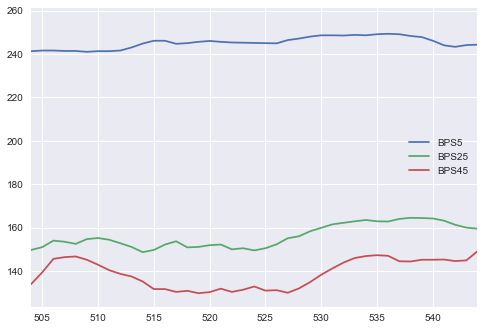

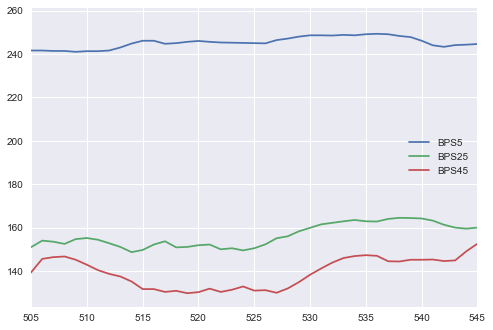

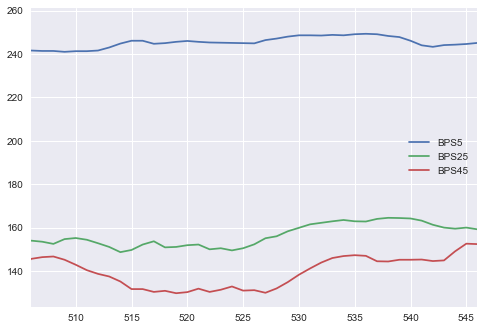

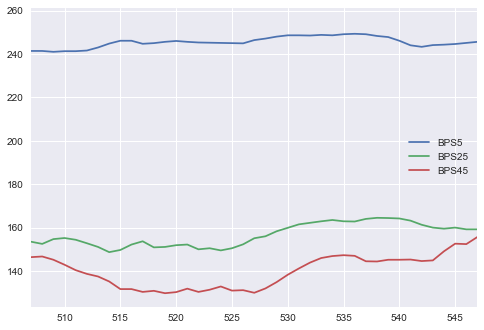

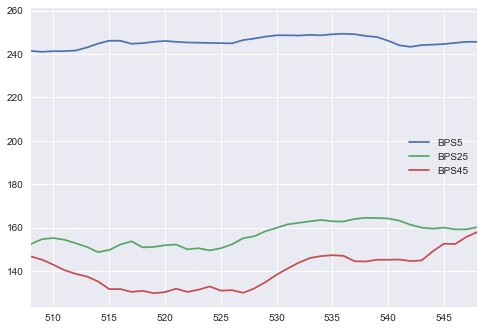

In [20]:
for i in c_result[0]:
    df[triads[4]].plot(xlim=[i-20,i+20])
    

C:\Users\Ryzen\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


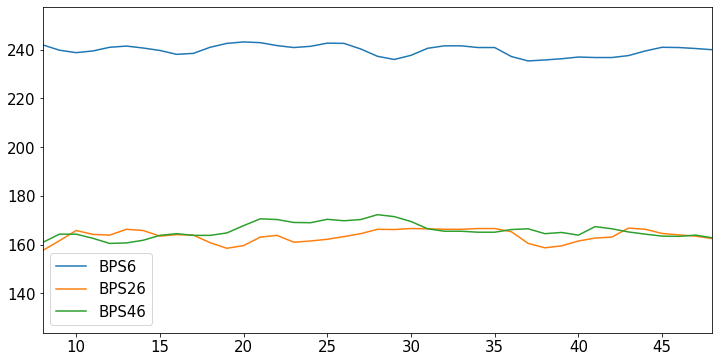

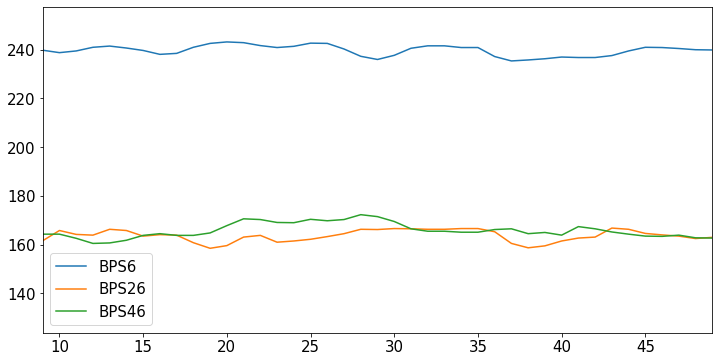

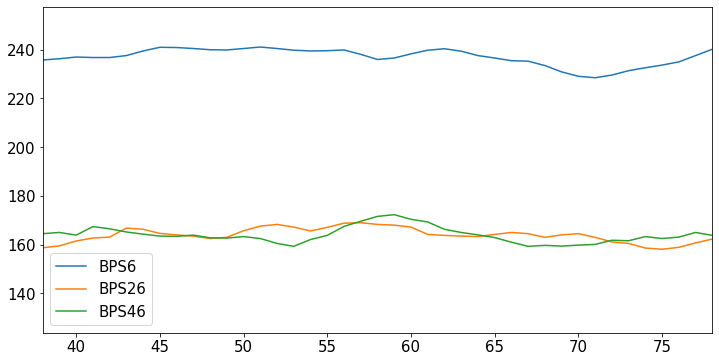

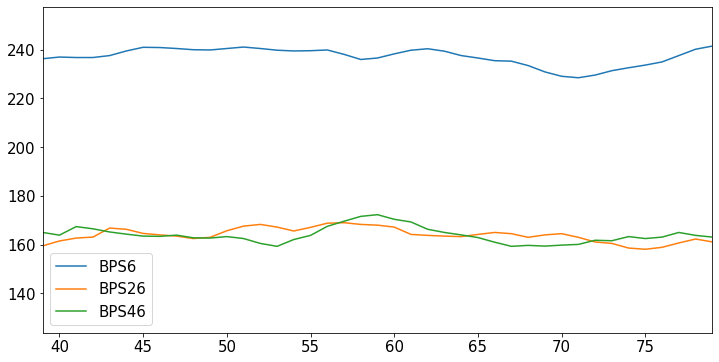

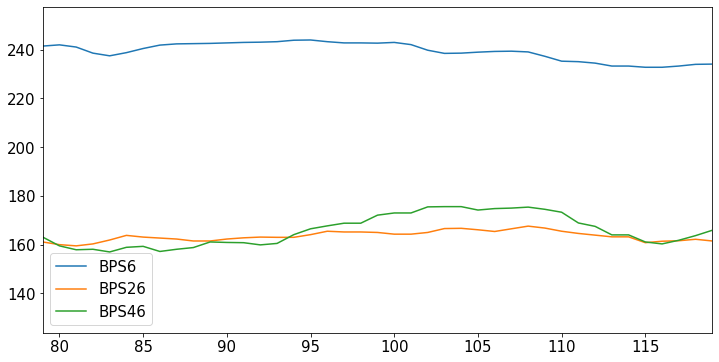

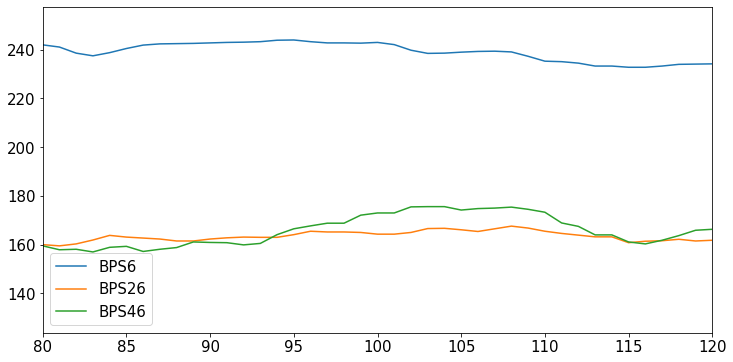

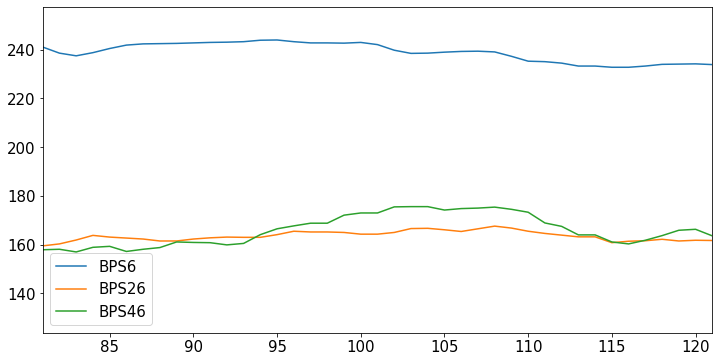

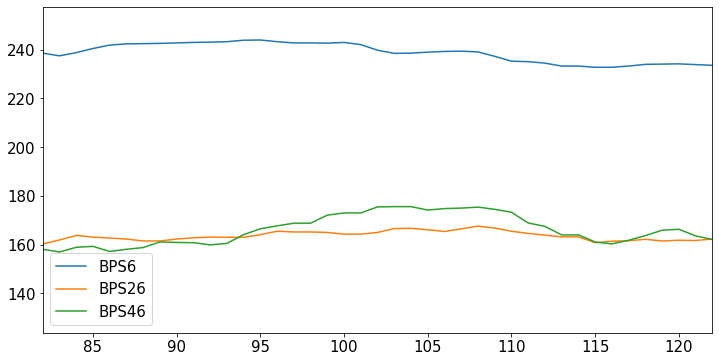

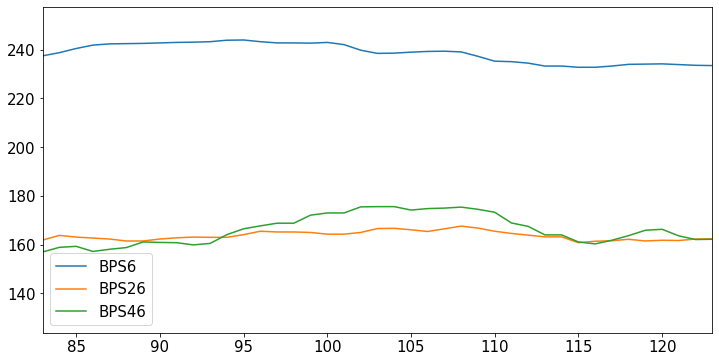

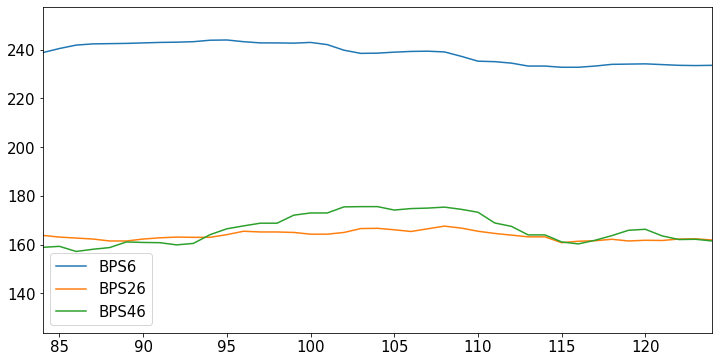

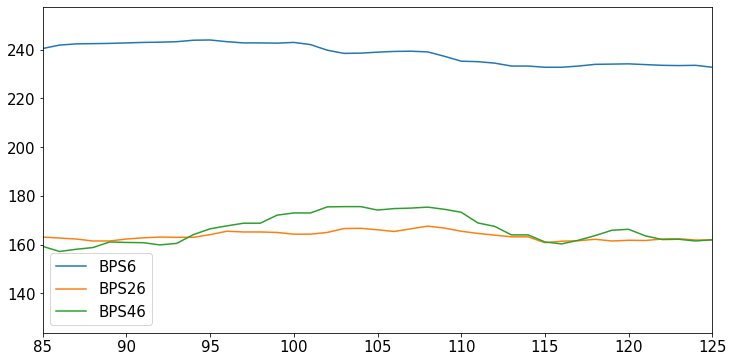

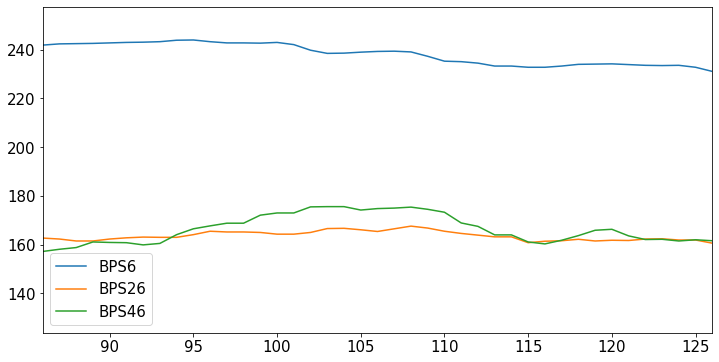

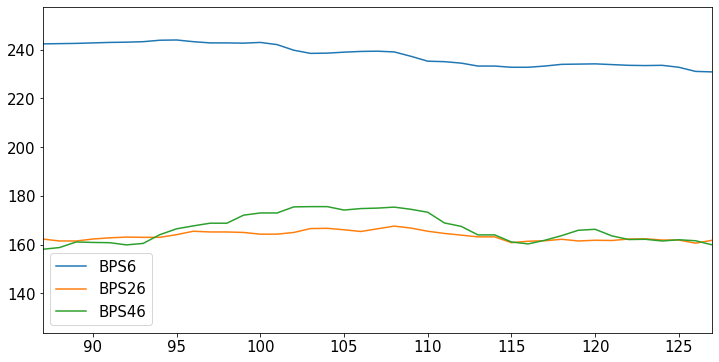

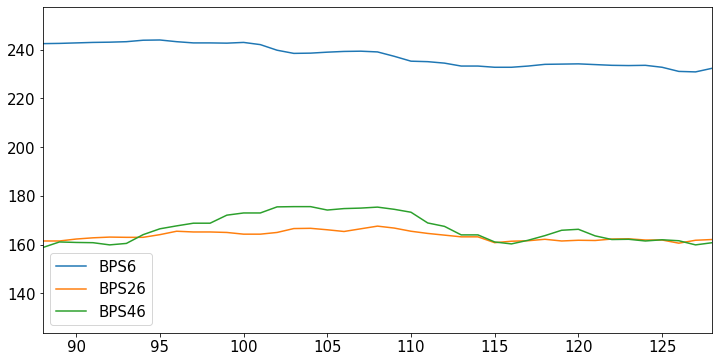

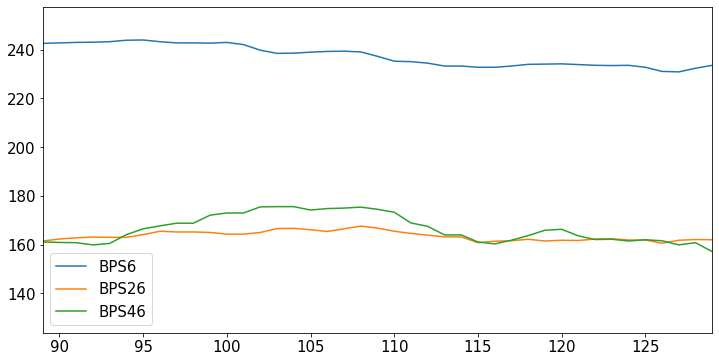

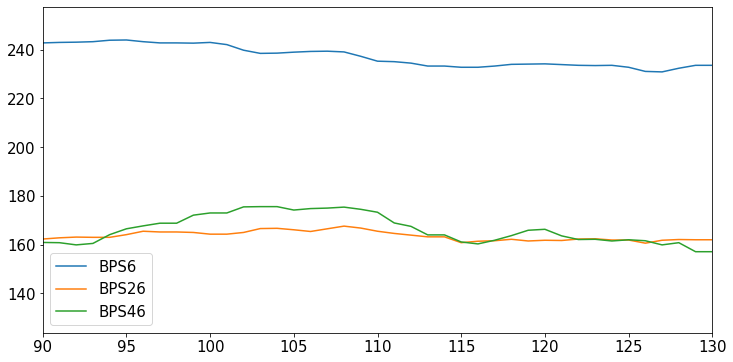

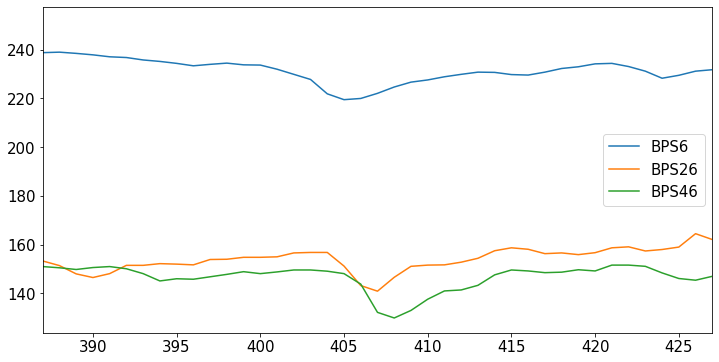

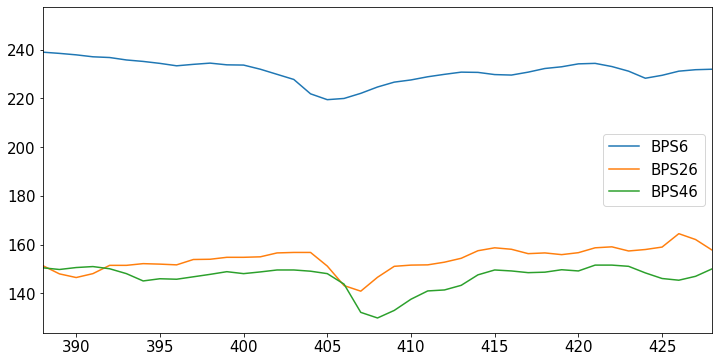

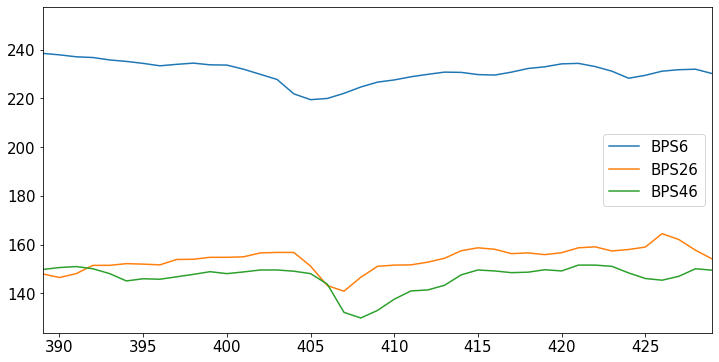

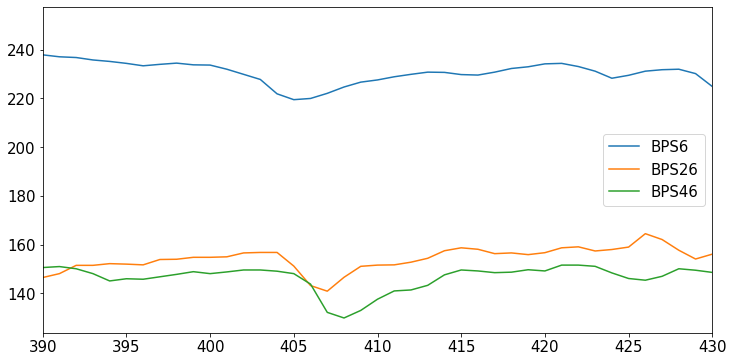

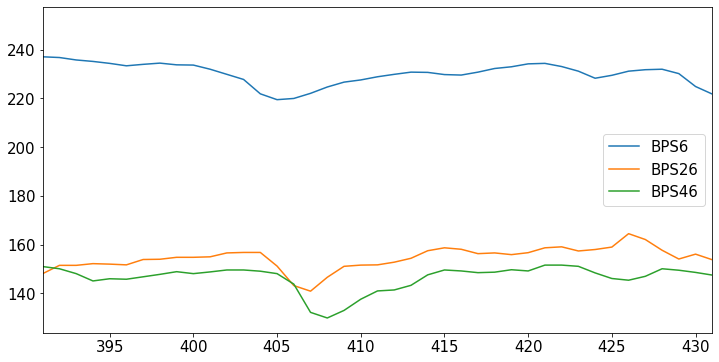

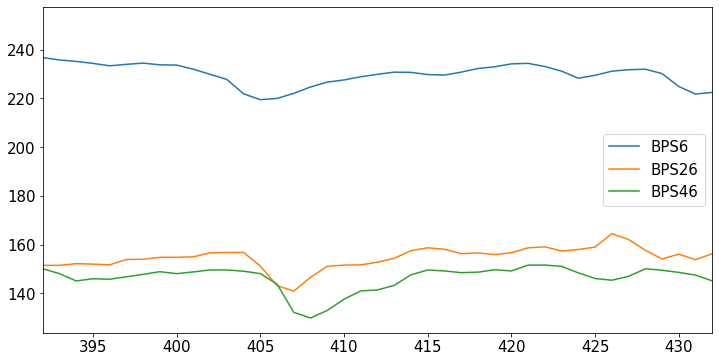

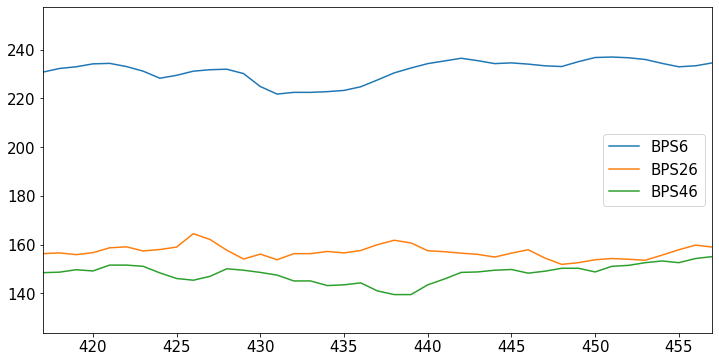

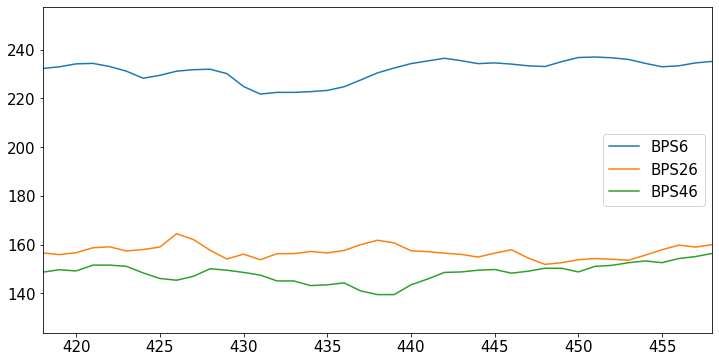

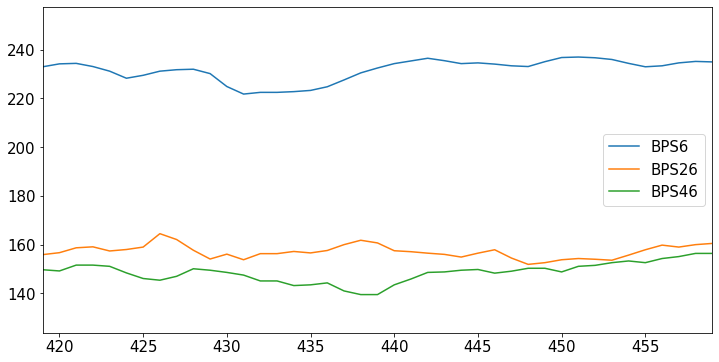

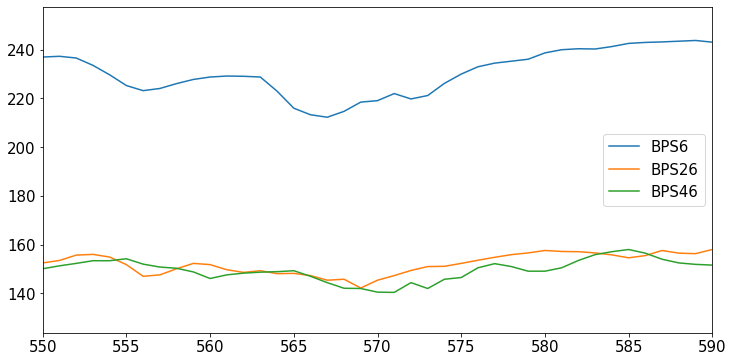

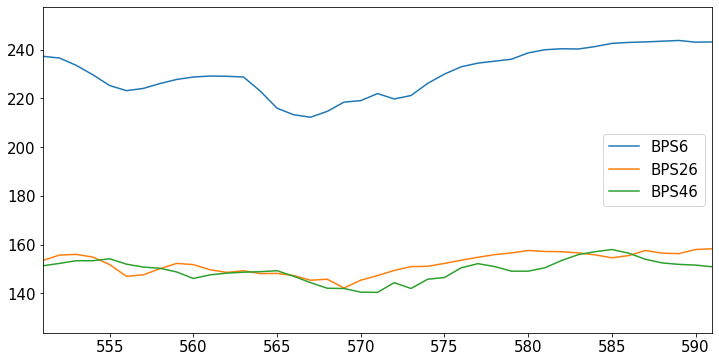

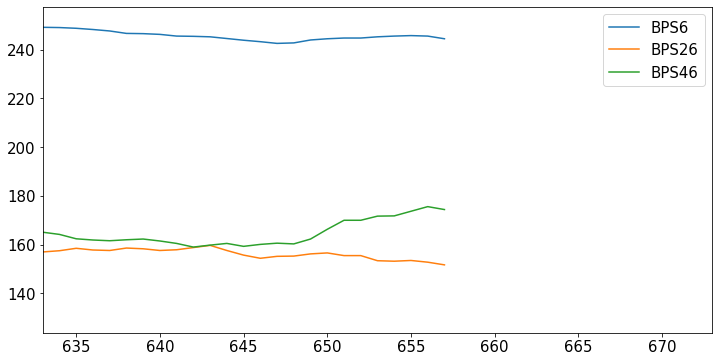

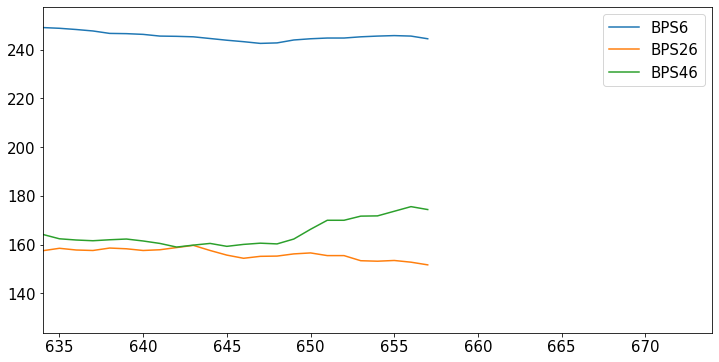

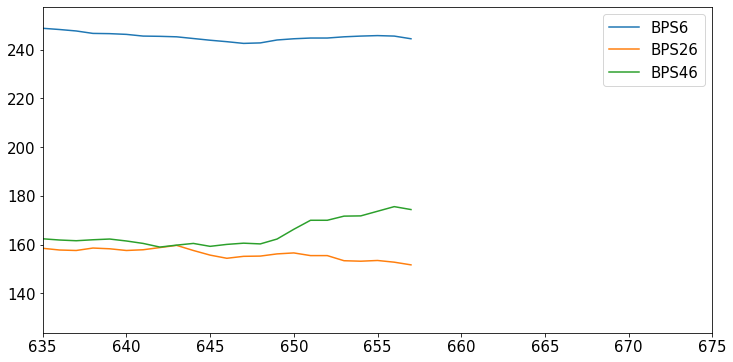

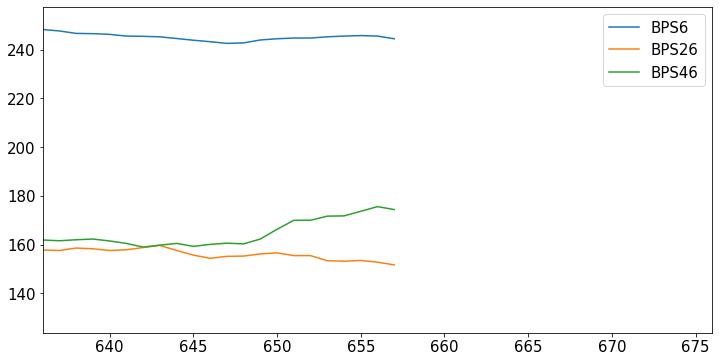

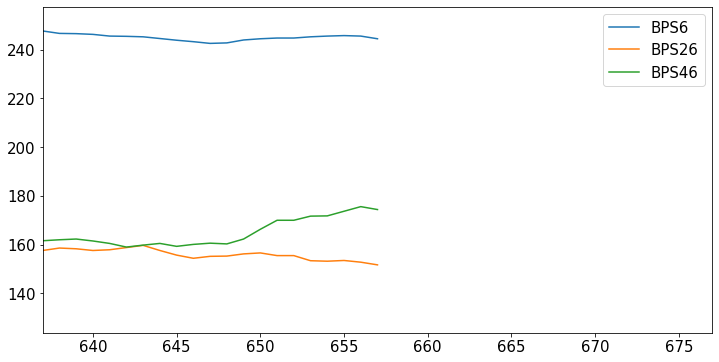

In [273]:
for i in c_result[1]:
    df[triads[5]].plot(xlim=[i-20,i+20])

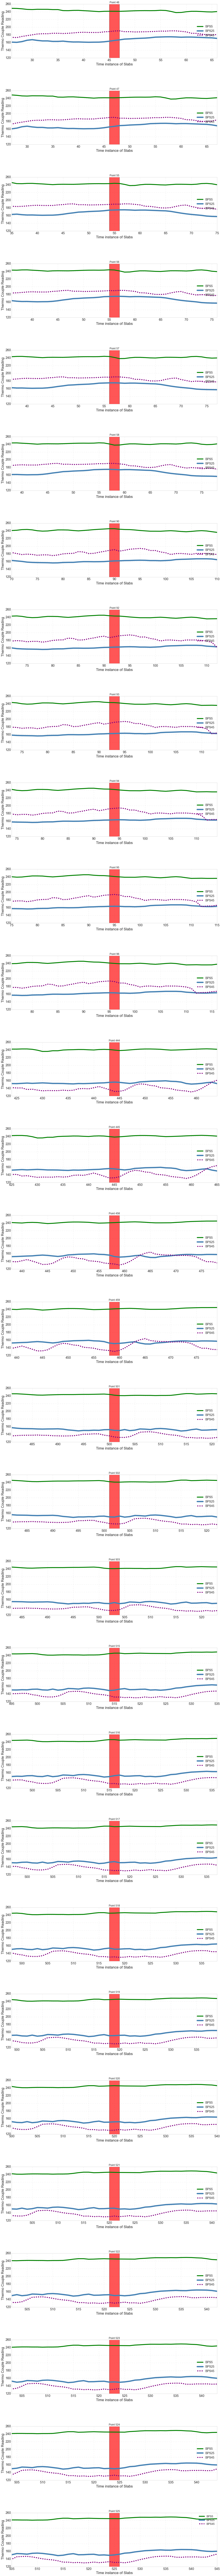

In [82]:

plt.style.use('seaborn-whitegrid')
det= c_result[0]
tr=triads[4]
fig, axs = plt.subplots(30, figsize=(20, 200))
colors= ['green', 'steelblue', 'purple']
l_width=[5,7,5]
l_style=['solid', 'solid', 'dashed']

for i in range(30):
    label_= 'Point ' + str(det[i])
    for j in range(3):
        axs[i].plot(df[tr[j]],label=tr[j], linewidth=l_width[j], color=colors[j], linestyle=l_style[j])
        axs[i].axvspan(det[i]-1,det[i]+1, facecolor='r', alpha=0.3)
        axs[i].set_title(label_)
        axs[i].set_ylabel('Thermo Couple Reading', fontsize=20)
        axs[i].set_xlabel('Time instance of Slabs', fontsize=20)
        axs[i].tick_params(axis='both', labelsize=18)
        axs[i].patch.set_linewidth('1')
        axs[i].legend(fontsize=16, loc='center right')
        axs[i].grid(axis = 'both', linestyle='--')
        axs[i].set_xlim(det[i]-20,det[i]+20)
plt.tight_layout(pad=10)
plt.legend()
plt.show()
              
        
               


IndexError: index 20 is out of bounds for axis 0 with size 20

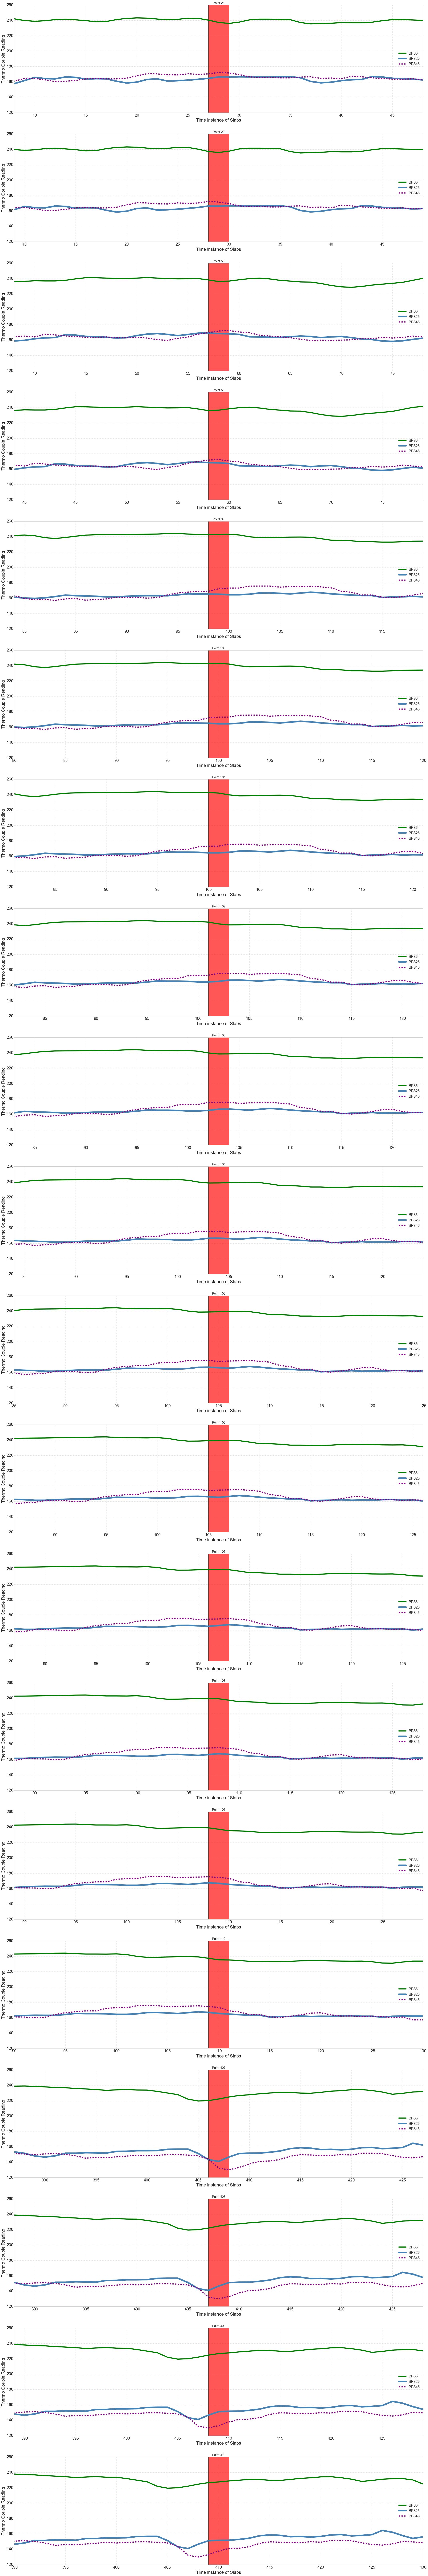

In [67]:

plt.style.use('seaborn-whitegrid')
det= c_result[1]
tr=triads[5]
fig, axs = plt.subplots(20, figsize=(len(c_result[0]), 200))
colors= ['green', 'steelblue', 'purple']
l_width=[5,7,5]
l_style=['solid', 'solid', 'dashed']

for i in range(len(det)):
    label_= 'Point ' + str(det[i])
    for j in range(3):
        axs[i].plot(df[tr[j]],label=tr[j], linewidth=l_width[j], color=colors[j], linestyle=l_style[j])
        axs[i].axvspan(det[i]-1,det[i]+1, facecolor='r', alpha=0.3)
        axs[i].set_title(label_)
        axs[i].set_ylabel('Thermo Couple Reading', fontsize=20)
        axs[i].set_xlabel('Time instance of Slabs', fontsize=20)
        axs[i].tick_params(axis='both', labelsize=18)
        axs[i].patch.set_linewidth('1')
        axs[i].legend(fontsize=16, loc='center right')
        axs[i].grid(axis = 'both', linestyle='--')
        axs[i].set_xlim(det[i]-20,det[i]+20)
plt.tight_layout(pad=10)
plt.legend()
plt.show()